In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
import pandas as pd
#files located in root
amazon_df = pd.read_csv('/content/gdrive/My Drive/amazon_cells_labelled.txt', sep='\t', header=None)
yelp_df = pd.read_csv('/content/gdrive/My Drive/yelp_labelled.txt', sep='\t', header=None)
imdb_df = pd.read_csv('/content/gdrive/My Drive/imdb_labelled.txt', sep='\t', header=None)
df = pd.concat([amazon_df, yelp_df, imdb_df]) #all reviews from the 3 different sources
df.columns = ['Sentence', 'Label']

Mounted at /content/gdrive


Preprocess Data! Convert to Lower Case, Remove Punctuation, Remove stopwords

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
meaninglessWords=list(stopwords.words('english'))
#Imported necessary pre-processing tools

def preprocess_func(sentences):
  """ 
  args: sentences => List of sentences that need to be preprocessed
  returns: cleaned_sentences => List of cleaned sentences that are lower-case, punctuation removed, and stopwords removed"""
  
  cleaned_sentences = []
  sents = sentences
  for i in range(len(sents)):
    sent = sents[i]
    sent = sent.lower() #convert to lowercase
    for char in sent:
      if char in string.punctuation:
        sent=sent.replace(char,"") #remove punctutation
    words = sent.split()
    sent = []
    for word in words:
      if word not in meaninglessWords:
        sent.append(word)
    sent = " ".join(sent) #remove stopwords
    cleaned_sentences.append(sent)
  return cleaned_sentences

cleaned_sentencesAmazon = preprocess_func(list(amazon_df[0]))
cleaned_sentencesYelp = preprocess_func(list(yelp_df[0]))
cleaned_sentencesIMDB = preprocess_func(list(imdb_df[0]))
amazon_df['Cleaned Sentences']=cleaned_sentencesAmazon
yelp_df['Cleaned Sentences'] = cleaned_sentencesYelp
imdb_df['Cleaned Sentences'] = cleaned_sentencesIMDB
amazon_df.columns = ['Sentence', 'Label', 'Cleaned Sentences']
amazon_df = amazon_df[['Sentence', 'Cleaned Sentences', 'Label']]
yelp_df.columns = ['Sentence', 'Label', 'Cleaned Sentences']
yelp_df = yelp_df[['Sentence', 'Cleaned Sentences', 'Label']]
imdb_df.columns = ['Sentence', 'Label', 'Cleaned Sentences']
imdb_df = imdb_df[['Sentence', 'Cleaned Sentences', 'Label']]




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.concat([amazon_df, yelp_df, imdb_df]) #all reviews from the 3 different sources
df.columns = ['Sentence', 'Cleaned Sentence', 'Label']
df = df.drop(labels='Sentence',axis=1)
df = df.sample(frac=1) #randomly shuffle rows
import numpy as np
#reset indices of dataframe 
idx = np.arange(0,df.shape[0])
df=df.set_index(idx)
df

,Cleaned Sentence,Label
0,much better ayce sushi place went vegas,1
1,owners really great people,1
2,able voice dialing car problem,1
3,wasted little money earpiece,0
4,first charge kept going dead 12 minutes,0
...,...,...
2743,predictable even chick flick,0
2744,star trek v final frontier worst series,0
2745,even squibs look awful,0
2746,chow mein good,1


In [ ]:
df.columns=['Sentence','Label']

So, we have preprocessed all 3 review datasets that comprise our original dataset. Then, we put them all into one big dataframe called df and shuffled them. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#converts sentences into tdfid vectors using varying n-gram sizes
cvModUnigram = CountVectorizer()
cvModBigram = CountVectorizer(ngram_range=(2,2))
cvModTrigram = CountVectorizer(ngram_range=(3,3))
cvModFourgram = CountVectorizer(ngram_range=(4,4))
cvModUniAndBi = CountVectorizer(ngram_range=(1,2))
cvModUniBiAndTri = CountVectorizer(ngram_range=(1,3))
countvectorsUnigram = cvModUnigram.fit_transform(df['Sentence'])
countvectorsBigram = cvModBigram.fit_transform(df['Sentence'])
countvectorsTrigram = cvModTrigram.fit_transform(df['Sentence'])
countvectorsFourgram = cvModFourgram.fit_transform(df['Sentence'])
countvectorsUniAndBi = cvModUniAndBi.fit_transform(df['Sentence'])
countvectorsUniBiAndTri = cvModUniBiAndTri.fit_transform(df['Sentence'])
featureAsWordsUnigram = cvModUnigram.get_feature_names()
featuresBigram = cvModBigram.get_feature_names()
featuresTrigram = cvModTrigram.get_feature_names()
featuresFourgram = cvModFourgram.get_feature_names()
featureUniAndBi = cvModUniAndBi.get_feature_names()
featuresUniBiAndTri = cvModUniBiAndTri.get_feature_names()
from sklearn.feature_extraction.text import TfidfTransformer
tfidfMod =TfidfTransformer()
tfidfVecsUnigram = tfidfMod.fit_transform(countvectorsUnigram,y=None)
tfidfVecsBigram = tfidfMod.fit_transform(countvectorsBigram, y=None)
tfidfVecsTrigram = tfidfMod.fit_transform(countvectorsTrigram, y=None) 
tfidfVecsFourgram = tfidfMod.fit_transform(countvectorsFourgram, y=None)
tfidfVecsUniAndBi = tfidfMod.fit_transform(countvectorsUniAndBi, y=None)
tfidfVecsUniBiAndTri = tfidfMod.fit_transform(countvectorsUniBiAndTri, y=None)
tfidfVecsUnigram = tfidfVecsUnigram.toarray() #unigram tfidf vectors
tfidfVecsBigram = tfidfVecsBigram.toarray() #bigram tfidf vectors
tfidfVecsTrigram = tfidfVecsTrigram.toarray() #trigram
tfidfVecsFourgram = tfidfVecsFourgram.toarray() #fourgram
tfidfVecsUniAndBi = tfidfVecsUniAndBi.toarray() #unigram and bigram
tfidfVecsUniBiAndTri = tfidfVecsUniBiAndTri.toarray() #uni, bi, and trigram


In [ ]:
columnsUni = [num for num in range(tfidfVecsUnigram.shape[1])]
columnsBi = [num for num in range(tfidfVecsBigram.shape[1])]
columnsTri = [num for num in range(tfidfVecsTrigram.shape[1])]
columnsFour = [num for num in range(tfidfVecsFourgram.shape[1])]
columnsUniAndBi = [num for num in range(tfidfVecsUniAndBi.shape[1])]
columnsUniBiAndTri = [num for num in range(tfidfVecsUniBiAndTri.shape[1])]
index = [num for num in range(tfidfVecsUnigram.shape[0])]
tfidfUniDF = pd.DataFrame(data=tfidfVecsUnigram,index=index,columns=columnsUni)
tfidfBiDF = pd.DataFrame(data=tfidfVecsBigram,index=index, columns=columnsBi)
tfidfTriDF = pd.DataFrame(data=tfidfVecsTrigram,index=index, columns=columnsTri)
tfidfFourDF = pd.DataFrame(data=tfidfVecsFourgram, index = index, columns=columnsFour)
tfidfUniAndBiDF = pd.DataFrame(data=tfidfVecsUniAndBi,index=index, columns=columnsUniAndBi)
tfidfUniBiAndTriDF = pd.DataFrame(data=tfidfVecsUniBiAndTri,index=index,columns=columnsUniBiAndTri)
tfidfUniDF.columns=featureAsWordsUnigram
tfidfBiDF.columns =featuresBigram
tfidfTriDF.columns = featuresTrigram
tfidfFourDF.columns = featuresFourgram
tfidfUniAndBiDF.columns = featureUniAndBi
tfidfUniBiAndTriDF.columns = featuresUniBiAndTri
tfidfUniDF.insert(tfidfUniDF.shape[1],'Label',df['Label'])
tfidfBiDF.insert(tfidfBiDF.shape[1],'Label',df['Label'])
tfidfTriDF.insert(tfidfTriDF.shape[1],'Label',df['Label'])
tfidfFourDF.insert(tfidfFourDF.shape[1],'Label',df['Label'])
tfidfUniAndBiDF.insert(tfidfUniAndBiDF.shape[1],'Label',df['Label'])
tfidfUniBiAndTriDF.insert(tfidfUniBiAndTriDF.shape[1],'Label',df['Label'])

# creates dataframes of all the different n-gram tfidf vectors with the appropriate feature names and the label column as the rightmost column

In [ ]:
tfidfUniAndBiDF

,010,010 grade,10,10 10,10 110,10 amazing,10 feet,10 minutes,10 movie,10 oyvey,10 plus,10 saved,10 simply,10 stars,10 think,10 times,10 years,100,100 functional,100 recommended,100 times,1010,11,11 months,110,110 scale,110 setting,1199,1199 sandwich,12,12 hours,12 mega,12 mile,12 minutes,12 ridiculous,12 years,13,13 bucks,13 megapixels,15,...,younger,younger set,youre,youre familiar,youre gonna,youre looking,youre outrageously,youre served,youre visually,youthful,youthful energy,youtube,youve,youve must,yucky,yukon,yukon gold,yum,yum sauce,yum yum,yummy,yummy christmas,yummy try,yummy tummy,yun,yun fat,z500a,z500a im,zero,zero stars,zero taste,zillion,zillion times,zombie,zombie movies,zombiestudents,zombiestudents back,zombiez,zombiez part,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2646,0.0,0.0,0.0,0.318231,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Note, I created varying sizes of n-gram tfidf vectors for the shuffled dataframe but not for the individual specific dataframes (individual specific = amazon, yelp, and imdb). Will do that now

In [ ]:
amazon_df=amazon_df.drop(labels='Sentence',axis=1)
amazon_df.columns=['Sentence','Label']
amazon_df

,Sentence,Label
0,way plug us unless go converter,0
1,good case excellent value,1
2,great jawbone,1
3,tied charger conversations lasting 45 minutesm...,0
4,mic great,1
...,...,...
995,screen get smudged easily touches ear face,0
996,piece junk lose calls phone,0
997,item match picture,0
998,thing disappoint infra red port irda,0


In [ ]:
yelp_df = yelp_df.drop(labels='Sentence', axis=1)
yelp_df.columns=['Sentence','Label']
yelp_df

,Sentence,Label
0,wow loved place,1
1,crust good,0
2,tasty texture nasty,0
3,stopped late may bank holiday rick steve recom...,1
4,selection menu great prices,1
...,...,...
995,think food flavor texture lacking,0
996,appetite instantly gone,0
997,overall impressed would go back,0
998,whole experience underwhelming think well go n...,0


In [ ]:
imdb_df=imdb_df.drop(labels='Sentence',axis=1)
imdb_df.columns=['Sentence','Label']
imdb_df

,Sentence,Label
0,slowmoving aimless movie distressed drifting y...,0
1,sure lost flat characters audience nearly half...,0
2,attempting artiness black white clever camera ...,0
3,little music anything speak,0
4,best scene movie gerardo trying find song keep...,1
...,...,...
743,got bored watching jessice lange take clothes,0
744,unfortunately virtue films production work los...,0
745,word embarrassing,0
746,exceptionally bad,0


In [ ]:
AmazoncountvectorsUnigram = cvModUnigram.fit_transform(amazon_df['Sentence'])
AmazoncountvectorsBigram = cvModBigram.fit_transform(amazon_df['Sentence'])
AmazoncountvectorsTrigram = cvModTrigram.fit_transform(amazon_df['Sentence'])
AmazoncountvectorsFourgram = cvModFourgram.fit_transform(amazon_df['Sentence'])
AmazoncountvectorsUniAndBi = cvModUniAndBi.fit_transform(amazon_df['Sentence'])
AmazoncountvectorsUniBiAndTri = cvModUniBiAndTri.fit_transform(amazon_df['Sentence'])

AmazontfidfVecsUnigram = tfidfMod.fit_transform(AmazoncountvectorsUnigram,y=None)
AmazontfidfVecsBigram = tfidfMod.fit_transform(AmazoncountvectorsBigram, y=None)
AmazontfidfVecsTrigram = tfidfMod.fit_transform(AmazoncountvectorsTrigram, y=None) 
AmazontfidfVecsFourgram = tfidfMod.fit_transform(AmazoncountvectorsFourgram, y=None)
AmazontfidfVecsUniAndBi = tfidfMod.fit_transform(AmazoncountvectorsUniAndBi, y=None)
AmazontfidfVecsUniBiAndTri = tfidfMod.fit_transform(AmazoncountvectorsUniBiAndTri, y=None)
AmazontfidfVecsUnigram = AmazontfidfVecsUnigram.toarray() #unigram tfidf vectors
AmazontfidfVecsBigram = AmazontfidfVecsBigram.toarray() #bigram tfidf vectors
AmazontfidfVecsTrigram = AmazontfidfVecsTrigram.toarray() #trigram
AmazontfidfVecsFourgram = AmazontfidfVecsFourgram.toarray() #fourgram
AmazontfidfVecsUniAndBi = AmazontfidfVecsUniAndBi.toarray() #unigram and bigram
AmazontfidfVecsUniBiAndTri = AmazontfidfVecsUniBiAndTri.toarray() #uni, bi, and trigram

AmazoncolumnsUni = [num for num in range(AmazontfidfVecsUnigram.shape[1])]
AmazoncolumnsBi = [num for num in range(AmazontfidfVecsBigram.shape[1])]
AmazoncolumnsTri = [num for num in range(AmazontfidfVecsTrigram.shape[1])]
AmazoncolumnsFour = [num for num in range(AmazontfidfVecsFourgram.shape[1])]
AmazoncolumnsUniAndBi = [num for num in range(AmazontfidfVecsUniAndBi.shape[1])]
AmazoncolumnsUniBiAndTri = [num for num in range(AmazontfidfVecsUniBiAndTri.shape[1])]

Amazonindex = [num for num in range(AmazontfidfVecsUnigram.shape[0])]


AmazontfidfUniDF = pd.DataFrame(data=AmazontfidfVecsUnigram,index=Amazonindex,columns=AmazoncolumnsUni)
AmazontfidfBiDF = pd.DataFrame(data=AmazontfidfVecsBigram,index=Amazonindex, columns=AmazoncolumnsBi)
AmazontfidfTriDF = pd.DataFrame(data=AmazontfidfVecsTrigram,index=Amazonindex, columns=AmazoncolumnsTri)
AmazontfidfFourDF = pd.DataFrame(data=AmazontfidfVecsFourgram, index = Amazonindex, columns=AmazoncolumnsFour)
AmazontfidfUniAndBiDF = pd.DataFrame(data=AmazontfidfVecsUniAndBi,index=Amazonindex, columns=AmazoncolumnsUniAndBi)
AmazontfidfUniBiAndTriDF = pd.DataFrame(data=AmazontfidfVecsUniBiAndTri,index=Amazonindex,columns=AmazoncolumnsUniBiAndTri)

AmazontfidfUniDF.insert(AmazontfidfUniDF.shape[1],'Label',amazon_df['Label'])
AmazontfidfBiDF.insert(AmazontfidfBiDF.shape[1],'Label',amazon_df['Label'])
AmazontfidfTriDF.insert(AmazontfidfTriDF.shape[1],'Label',amazon_df['Label'])
AmazontfidfFourDF.insert(AmazontfidfFourDF.shape[1],'Label',amazon_df['Label'])
AmazontfidfUniAndBiDF.insert(AmazontfidfUniAndBiDF.shape[1],'Label',amazon_df['Label'])
AmazontfidfUniBiAndTriDF.insert(AmazontfidfUniBiAndTriDF.shape[1],'Label',amazon_df['Label'])

YelpcountvectorsUnigram = cvModUnigram.fit_transform(yelp_df['Sentence'])
YelpcountvectorsBigram = cvModBigram.fit_transform(yelp_df['Sentence'])
YelpcountvectorsTrigram = cvModTrigram.fit_transform(yelp_df['Sentence'])
YelpcountvectorsFourgram = cvModFourgram.fit_transform(yelp_df['Sentence'])
YelpcountvectorsUniAndBi = cvModUniAndBi.fit_transform(yelp_df['Sentence'])
YelpcountvectorsUniBiAndTri = cvModUniBiAndTri.fit_transform(yelp_df['Sentence'])

YelptfidfVecsUnigram = tfidfMod.fit_transform(YelpcountvectorsUnigram,y=None)
YelptfidfVecsBigram = tfidfMod.fit_transform(YelpcountvectorsBigram, y=None)
YelptfidfVecsTrigram = tfidfMod.fit_transform(YelpcountvectorsTrigram, y=None) 
YelptfidfVecsFourgram = tfidfMod.fit_transform(YelpcountvectorsFourgram, y=None)
YelptfidfVecsUniAndBi = tfidfMod.fit_transform(YelpcountvectorsUniAndBi, y=None)
YelptfidfVecsUniBiAndTri = tfidfMod.fit_transform(YelpcountvectorsUniBiAndTri, y=None)
YelptfidfVecsUnigram = YelptfidfVecsUnigram.toarray() #unigram tfidf vectors
YelptfidfVecsBigram = YelptfidfVecsBigram.toarray() #bigram tfidf vectors
YelptfidfVecsTrigram = YelptfidfVecsTrigram.toarray() #trigram
YelptfidfVecsFourgram = YelptfidfVecsFourgram.toarray() #fourgram
YelptfidfVecsUniAndBi = YelptfidfVecsUniAndBi.toarray() #unigram and bigram
YelptfidfVecsUniBiAndTri = YelptfidfVecsUniBiAndTri.toarray() #uni, bi, and trigram

YelpcolumnsUni = [num for num in range(YelptfidfVecsUnigram.shape[1])]
YelpcolumnsBi = [num for num in range(YelptfidfVecsBigram.shape[1])]
YelpcolumnsTri = [num for num in range(YelptfidfVecsTrigram.shape[1])]
YelpcolumnsFour = [num for num in range(YelptfidfVecsFourgram.shape[1])]
YelpcolumnsUniAndBi = [num for num in range(YelptfidfVecsUniAndBi.shape[1])]
YelpcolumnsUniBiAndTri = [num for num in range(YelptfidfVecsUniBiAndTri.shape[1])]

Yelpindex = [num for num in range(YelptfidfVecsUnigram.shape[0])]

YelptfidfUniDF = pd.DataFrame(data=YelptfidfVecsUnigram,index=Yelpindex,columns=YelpcolumnsUni)
YelptfidfBiDF = pd.DataFrame(data=YelptfidfVecsBigram,index=Yelpindex, columns=YelpcolumnsBi)
YelptfidfTriDF = pd.DataFrame(data=YelptfidfVecsTrigram,index=Yelpindex, columns=YelpcolumnsTri)
YelptfidfFourDF = pd.DataFrame(data=YelptfidfVecsFourgram, index =Yelpindex, columns=YelpcolumnsFour)
YelptfidfUniAndBiDF = pd.DataFrame(data=YelptfidfVecsUniAndBi,index=Yelpindex, columns=YelpcolumnsUniAndBi)
YelptfidfUniBiAndTriDF = pd.DataFrame(data=YelptfidfVecsUniBiAndTri,index=Yelpindex,columns=YelpcolumnsUniBiAndTri)

YelptfidfUniDF.insert(YelptfidfUniDF.shape[1],'Label',yelp_df['Label'])
YelptfidfBiDF.insert(YelptfidfBiDF.shape[1],'Label',yelp_df['Label'])
YelptfidfTriDF.insert(YelptfidfTriDF.shape[1],'Label',yelp_df['Label'])
YelptfidfFourDF.insert(YelptfidfFourDF.shape[1],'Label',yelp_df['Label'])
YelptfidfUniAndBiDF.insert(YelptfidfUniAndBiDF.shape[1],'Label',yelp_df['Label'])
YelptfidfUniBiAndTriDF.insert(YelptfidfUniBiAndTriDF.shape[1],'Label',yelp_df['Label'])

IMDBcountvectorsUnigram = cvModUnigram.fit_transform(imdb_df['Sentence'])
IMDBcountvectorsBigram = cvModBigram.fit_transform(imdb_df['Sentence'])
IMDBcountvectorsTrigram = cvModTrigram.fit_transform(imdb_df['Sentence'])
IMDBcountvectorsFourgram = cvModFourgram.fit_transform(imdb_df['Sentence'])
IMDBcountvectorsUniAndBi = cvModUniAndBi.fit_transform(imdb_df['Sentence'])
IMDBcountvectorsUniBiAndTri = cvModUniBiAndTri.fit_transform(imdb_df['Sentence'])

IMDBtfidfVecsUnigram = tfidfMod.fit_transform(IMDBcountvectorsUnigram,y=None)
IMDBtfidfVecsBigram = tfidfMod.fit_transform(IMDBcountvectorsBigram, y=None)
IMDBtfidfVecsTrigram = tfidfMod.fit_transform(IMDBcountvectorsTrigram, y=None) 
IMDBtfidfVecsFourgram = tfidfMod.fit_transform(IMDBcountvectorsFourgram, y=None)
IMDBtfidfVecsUniAndBi = tfidfMod.fit_transform(IMDBcountvectorsUniAndBi, y=None)
IMDBtfidfVecsUniBiAndTri = tfidfMod.fit_transform(IMDBcountvectorsUniBiAndTri, y=None)
IMDBtfidfVecsUnigram = IMDBtfidfVecsUnigram.toarray() #unigram tfidf vectors
IMDBtfidfVecsBigram = IMDBtfidfVecsBigram.toarray() #bigram tfidf vectors
IMDBtfidfVecsTrigram = IMDBtfidfVecsTrigram.toarray() #trigram
IMDBtfidfVecsFourgram = IMDBtfidfVecsFourgram.toarray() #fourgram
IMDBtfidfVecsUniAndBi = IMDBtfidfVecsUniAndBi.toarray() #unigram and bigram
IMDBtfidfVecsUniBiAndTri = IMDBtfidfVecsUniBiAndTri.toarray() #uni, bi, and trigram

IMDBcolumnsUni = [num for num in range(IMDBtfidfVecsUnigram.shape[1])]
IMDBcolumnsBi = [num for num in range(IMDBtfidfVecsBigram.shape[1])]
IMDBcolumnsTri = [num for num in range(IMDBtfidfVecsTrigram.shape[1])]
IMDBcolumnsFour = [num for num in range(IMDBtfidfVecsFourgram.shape[1])]
IMDBcolumnsUniAndBi = [num for num in range(IMDBtfidfVecsUniAndBi.shape[1])]
IMDBcolumnsUniBiAndTri = [num for num in range(IMDBtfidfVecsUniBiAndTri.shape[1])]

IMDBindex = [num for num in range(IMDBtfidfVecsUnigram.shape[0])]

IMDBtfidfUniDF = pd.DataFrame(data=IMDBtfidfVecsUnigram,index=IMDBindex,columns=IMDBcolumnsUni)
IMDBtfidfBiDF = pd.DataFrame(data=IMDBtfidfVecsBigram,index=IMDBindex, columns=IMDBcolumnsBi)
IMDBtfidfTriDF = pd.DataFrame(data=IMDBtfidfVecsTrigram,index=IMDBindex, columns=IMDBcolumnsTri)
IMDBtfidfFourDF = pd.DataFrame(data=IMDBtfidfVecsFourgram, index =IMDBindex, columns=IMDBcolumnsFour)
IMDBtfidfUniAndBiDF = pd.DataFrame(data=IMDBtfidfVecsUniAndBi,index=IMDBindex, columns=IMDBcolumnsUniAndBi)
IMDBtfidfUniBiAndTriDF = pd.DataFrame(data=IMDBtfidfVecsUniBiAndTri,index=IMDBindex,columns=IMDBcolumnsUniBiAndTri)

IMDBtfidfUniDF.insert(IMDBtfidfUniDF.shape[1],'Label',imdb_df['Label'])
IMDBtfidfBiDF.insert(IMDBtfidfBiDF.shape[1],'Label',imdb_df['Label'])
IMDBtfidfTriDF.insert(IMDBtfidfTriDF.shape[1],'Label',imdb_df['Label'])
IMDBtfidfFourDF.insert(IMDBtfidfFourDF.shape[1],'Label',imdb_df['Label'])
IMDBtfidfUniAndBiDF.insert(IMDBtfidfUniAndBiDF.shape[1],'Label',imdb_df['Label'])
IMDBtfidfUniBiAndTriDF.insert(IMDBtfidfUniBiAndTriDF.shape[1],'Label',imdb_df['Label'])

# Converts site-specific data into varying n-gram tfidf dataframes with label as rightmost col

So, I now have multiple dataframes corresponding to the mix of reviews and each site-specific reviews and for each of these I have unigram, bigram, etc.. tfidf dataframes

Models implemented with use of tfidf vectors of varying n-gram styles and on the different datasets

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

Train-Test Split

In [ ]:
tfidfUniDF = tfidfUniDF.drop(labels='Label',axis=1)
tfidfBiDF = tfidfBiDF.drop(labels='Label', axis = 1)
tfidfTriDF = tfidfTriDF.drop(labels='Label', axis=1)
tfidfFourDF = tfidfFourDF.drop(labels='Label',axis=1)
tfidfUniAndBiDF = tfidfUniAndBiDF.drop(labels='Label',axis=1)
tfidfUniBiAndTriDF = tfidfUniBiAndTriDF.drop(labels='Label',axis=1)
AmazontfidfUniDF = AmazontfidfUniDF.drop(labels='Label',axis=1)
AmazontfidfBiDF = AmazontfidfBiDF.drop(labels='Label',axis=1)
AmazontfidfTriDF = AmazontfidfTriDF.drop(labels='Label',axis=1)
AmazontfidfFourDF = AmazontfidfFourDF.drop(labels='Label',axis=1)
AmazontfidfUniAndBiDF = AmazontfidfUniAndBiDF.drop(labels='Label',axis=1)
AmazontfidfUniBiAndTriDF = AmazontfidfUniBiAndTriDF.drop(labels='Label',axis=1)
YelptfidfUniDF = YelptfidfUniDF.drop(labels='Label',axis=1)
YelptfidfBiDF = YelptfidfBiDF.drop(labels='Label',axis=1)
YelptfidfTriDF = YelptfidfTriDF.drop(labels='Label',axis=1)
YelptfidfFourDF = YelptfidfFourDF.drop(labels='Label',axis=1)
YelptfidfUniAndBiDF = YelptfidfUniAndBiDF.drop(labels='Label',axis=1)
YelptfidfUniBiAndTriDF = YelptfidfUniBiAndTriDF.drop(labels='Label',axis=1)
IMDBtfidfUniDF = IMDBtfidfUniDF.drop(labels='Label',axis=1)
IMDBtfidfBiDF = IMDBtfidfBiDF.drop(labels='Label',axis=1)
IMDBtfidfTriDF = IMDBtfidfTriDF.drop(labels='Label',axis=1)
IMDBtfidfFourDF = IMDBtfidfFourDF.drop(labels='Label',axis=1)
IMDBtfidfUniAndBiDF = IMDBtfidfUniAndBiDF.drop(labels='Label',axis=1)
IMDBtfidfUniBiAndTriDF = IMDBtfidfUniBiAndTriDF.drop(labels='Label',axis=1)

#dropped the labels for all the dataframes

labels = df['Label']
AmazonLabels = amazon_df['Label']
YelpLabels = yelp_df['Label']
IMDBLabels = imdb_df['Label']

#stored the labels in appropriate variables

unigramTrain, unigramTest, unigramTrainLabels, unigramTestLabels = train_test_split(tfidfUniDF, labels)
bigramTrain, bigramTest, bigramTrainLabels, bigramTestLabels = train_test_split(tfidfBiDF, labels)
trigramTrain, trigramTest, trigramTrainLabels, trigramTestLabels = train_test_split(tfidfTriDF, labels)
fourgramTrain, fourgramTest, fourgramTrainLabels, fourgramTestLabels = train_test_split(tfidfFourDF, labels)
unigramAndbigramTrain, unigramAndbigramTest, unigramAndBigramTrainLabels, unigramAndBigramTestLabels = train_test_split(tfidfUniAndBiDF, labels)
unigramBigramAndTrigramTrain, unigramBigramAndTrigramTest, unigramBigramAndTrigramTrainLabels, unigramBigramAndTrigramTestLabels = train_test_split(tfidfUniBiAndTriDF, labels)

#above code performed train/test splits for entire compilation of reviews for each n-gram style

AmazonunigramTrain, AmazonunigramTest, AmazonunigramTrainLabels, AmazonunigramTestLabels = train_test_split(AmazontfidfUniDF, AmazonLabels)
AmazonbigramTrain, AmazonbigramTest, AmazonbigramTrainLabels, AmazonbigramTestLabels = train_test_split(AmazontfidfBiDF, AmazonLabels)
AmazontrigramTrain, AmazontrigramTest, AmazontrigramTrainLabels, AmazontrigramTestLabels = train_test_split(AmazontfidfTriDF, AmazonLabels)
AmazonfourgramTrain, AmazonfourgramTest, AmazonfourgramTrainLabels, AmazonfourgramTestLabels = train_test_split(AmazontfidfFourDF, AmazonLabels)
AmazonunigramAndbigramTrain, AmazonunigramAndbigramTest, AmazonunigramAndBigramTrainLabels, AmazonunigramAndBigramTestLabels = train_test_split(AmazontfidfUniAndBiDF, AmazonLabels)
AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTest, AmazonunigramBigramAndTrigramTrainLabels, AmazonunigramBigramAndTrigramTestLabels = train_test_split(AmazontfidfUniBiAndTriDF, AmazonLabels)
#above code performed train/test splits for Amazon reviews for each n-gram style

YelpunigramTrain, YelpunigramTest, YelpunigramTrainLabels, YelpunigramTestLabels = train_test_split(YelptfidfUniDF, YelpLabels)
YelpbigramTrain, YelpbigramTest, YelpbigramTrainLabels, YelpbigramTestLabels = train_test_split(YelptfidfBiDF, YelpLabels)
YelptrigramTrain, YelptrigramTest, YelptrigramTrainLabels, YelptrigramTestLabels = train_test_split(YelptfidfTriDF, YelpLabels)
YelpfourgramTrain, YelpfourgramTest, YelpfourgramTrainLabels, YelpfourgramTestLabels = train_test_split(YelptfidfFourDF, YelpLabels)
YelpunigramAndbigramTrain, YelpunigramAndbigramTest, YelpunigramAndBigramTrainLabels, YelpunigramAndBigramTestLabels = train_test_split(YelptfidfUniAndBiDF, YelpLabels)
YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTest, YelpunigramBigramAndTrigramTrainLabels,YelpunigramBigramAndTrigramTestLabels = train_test_split(YelptfidfUniBiAndTriDF, YelpLabels)
#above code performed train/test splits for Yelp reviews for each n-gram style

IMDBunigramTrain, IMDBunigramTest, IMDBunigramTrainLabels, IMDBunigramTestLabels = train_test_split(IMDBtfidfUniDF, IMDBLabels)
IMDBbigramTrain, IMDBbigramTest, IMDBbigramTrainLabels, IMDBbigramTestLabels = train_test_split(IMDBtfidfBiDF, IMDBLabels)
IMDBtrigramTrain, IMDBtrigramTest, IMDBtrigramTrainLabels, IMDBtrigramTestLabels = train_test_split(IMDBtfidfTriDF, IMDBLabels)
IMDBfourgramTrain, IMDBfourgramTest, IMDBfourgramTrainLabels, IMDBfourgramTestLabels = train_test_split(IMDBtfidfFourDF, IMDBLabels)
IMDBunigramAndbigramTrain, IMDBunigramAndbigramTest, IMDBunigramAndBigramTrainLabels, IMDBunigramAndBigramTestLabels = train_test_split(IMDBtfidfUniAndBiDF, IMDBLabels)
IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTest, IMDBunigramBigramAndTrigramTrainLabels,IMDBunigramBigramAndTrigramTestLabels = train_test_split(IMDBtfidfUniBiAndTriDF, IMDBLabels)
#above code performed train/test splits for IMDB reviews for each n-gram style

Baseline Naive Bayes Accuracy results on tfidf vectors

In [ ]:
#on entire dataset
uniNB = MultinomialNB()
biNB = MultinomialNB()
triNB = MultinomialNB()
fourNB = MultinomialNB()
uniAndbiNB = MultinomialNB()
uniBiAndTriNB = MultinomialNB()

uniNB.fit(unigramTrain, unigramTrainLabels)
biNB.fit(bigramTrain, bigramTrainLabels)
triNB.fit(trigramTrain, trigramTrainLabels)
fourNB.fit(fourgramTrain, fourgramTrainLabels)
uniAndbiNB.fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriNB.fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

uniPreds = uniNB.predict(unigramTest)
biPreds = biNB.predict(bigramTest)
triPreds = triNB.predict(trigramTest)
fourPreds = fourNB.predict(fourgramTest)
uniAndBiPreds = uniAndbiNB.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriNB.predict(unigramBigramAndTrigramTest)

uniNBAcc = np.mean(uniPreds==unigramTestLabels)
biNBAcc = np.mean(biPreds==bigramTestLabels)
triNBAcc = np.mean(triPreds==trigramTestLabels)
fourNBAcc = np.mean(fourPreds==fourgramTestLabels)
uniAndBiNBAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriNBAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)

#on Amazon
AmazonuniNB = MultinomialNB()
AmazonbiNB = MultinomialNB()
AmazontriNB = MultinomialNB()
AmazonfourNB = MultinomialNB()
AmazonuniAndbiNB = MultinomialNB()
AmazonuniBiAndTriNB = MultinomialNB()

AmazonuniNB.fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiNB.fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriNB.fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourNB.fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndbiNB.fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriNB.fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

AmazonuniPreds = AmazonuniNB.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiNB.predict(AmazonbigramTest)
AmazontriPreds = AmazontriNB.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourNB.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndbiNB.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriNB.predict(AmazonunigramBigramAndTrigramTest)

AmazonuniNBAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiNBAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriNBAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourNBAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniAndBiNBAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriNBAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

#on Yelp

YelpuniNB = MultinomialNB()
YelpbiNB = MultinomialNB()
YelptriNB = MultinomialNB()
YelpfourNB = MultinomialNB()
YelpuniAndbiNB = MultinomialNB()
YelpuniBiAndTriNB = MultinomialNB()

YelpuniNB.fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiNB.fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriNB.fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourNB.fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndbiNB.fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriNB.fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

YelpuniPreds =YelpuniNB.predict(YelpunigramTest)
YelpbiPreds = YelpbiNB.predict(YelpbigramTest)
YelptriPreds = YelptriNB.predict(YelptrigramTest)
YelpfourPreds = YelpfourNB.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndbiNB.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriNB.predict(YelpunigramBigramAndTrigramTest)

YelpuniNBAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiNBAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriNBAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourNBAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniAndBiNBAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriNBAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

#on IMDB

IMDBuniNB = MultinomialNB()
IMDBbiNB = MultinomialNB()
IMDBtriNB = MultinomialNB()
IMDBfourNB = MultinomialNB()
IMDBuniAndbiNB = MultinomialNB()
IMDBuniBiAndTriNB = MultinomialNB()

IMDBuniNB.fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiNB.fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriNB.fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourNB.fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndbiNB.fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriNB.fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)

IMDBuniPreds =IMDBuniNB.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiNB.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriNB.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourNB.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndbiNB.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriNB.predict(IMDBunigramBigramAndTrigramTest)

IMDBuniNBAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiNBAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriNBAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourNBAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniAndBiNBAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriNBAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)

print("NB trained on entire dataset...\n")
print("unigram acc: " + str(uniNBAcc))
print("bigram acc: "+str(biNBAcc))
print("trigram acc: " + str(triNBAcc))
print("fourgram acc: " + str(fourNBAcc))
print("uni and bigram acc: " + str(uniAndBiNBAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriNBAcc))
print("NB trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniNBAcc))
print("bigram acc: "+str(AmazonbiNBAcc))
print("trigram acc: " + str(AmazontriNBAcc))
print("fourgram acc: " + str(AmazonfourNBAcc))
print("uni and bigram acc: " + str(AmazonuniAndBiNBAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriNBAcc))
print("NB trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniNBAcc))
print("bigram acc: "+str(YelpbiNBAcc))
print("trigram acc: " + str(YelptriNBAcc))
print("fourgram acc: " + str(YelpfourNBAcc))
print("uni and bigram acc: " + str(YelpuniAndBiNBAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriNBAcc))
print("NB trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniNBAcc))
print("bigram acc: "+str(IMDBbiNBAcc))
print("trigram acc: " + str(IMDBtriNBAcc))
print("fourgram acc: " + str(IMDBfourNBAcc))
print("uni and bigram acc: " + str(IMDBuniAndBiNBAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriNBAcc))


NB trained on entire dataset...

unigram acc: 0.8238719068413392
bigram acc: 0.5749636098981077
trigram acc: 0.5152838427947598
fourgram acc: 0.5021834061135371
uni and bigram acc: 0.7991266375545851
uni bi and trigram acc: 0.8049490538573508
NB trained on Amazon ...

unigram acc: 0.776
bigram acc: 0.532
trigram acc: 0.512
fourgram acc: 0.472
uni and bigram acc: 0.792
uni bi and trigram acc: 0.808
NB trained on Yelp ...

unigram acc: 0.768
bigram acc: 0.564
trigram acc: 0.472
fourgram acc: 0.48
uni and bigram acc: 0.78
uni bi and trigram acc: 0.74
NB trained on IMDB .. 

unigram acc: 0.7754010695187166
bigram acc: 0.5828877005347594
trigram acc: 0.49732620320855614
fourgram acc: 0.48128342245989303
uni and bigram acc: 0.7647058823529411
uni bi and trigram acc: 0.7486631016042781


Logistic Regression for n-gram models in the cell directly below

In [ ]:
from sklearn.linear_model import LogisticRegression

Logistic Regression (C = 1; default; lower C indicates stronger regularization penalty)

In [ ]:
uniLR = LogisticRegression().fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression().fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression().fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression().fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression().fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression().fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression().fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression().fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression().fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression().fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression().fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression().fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression().fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression().fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression().fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression().fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression().fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression().fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression().fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression().fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression().fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression().fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression().fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression().fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))


LR trained on entire dataset...

unigram acc: 0.8049490538573508
bigram acc: 0.5909752547307132
trigram acc: 0.5254730713245997
fourgram acc: 0.5225618631732168
uni and bigram acc: 0.7787481804949054
uni bi and trigram acc: 0.8034934497816594
LR trained on Amazon ...

unigram acc: 0.812
bigram acc: 0.632
trigram acc: 0.46
fourgram acc: 0.508
uni and bigram acc: 0.792
uni bi and trigram acc: 0.744
LR trained on Yelp ...

unigram acc: 0.712
bigram acc: 0.536
trigram acc: 0.476
fourgram acc: 0.492
uni and bigram acc: 0.752
uni bi and trigram acc: 0.764
LR trained on IMDB .. 

unigram acc: 0.7379679144385026
bigram acc: 0.5347593582887701
trigram acc: 0.48128342245989303
fourgram acc: 0.5026737967914439
uni and bigram acc: 0.7807486631016043
uni bi and trigram acc: 0.6363636363636364


Logistic Regression (C = 0.9 where smaller C indicates stronger regularization penalty)

In [ ]:
uniLR = LogisticRegression(C=0.9).fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression(C=0.9).fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression(C=0.9).fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression(C=0.9).fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression(C=0.9).fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression(C=0.9).fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression(C=0.9).fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression(C=0.9).fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression(C=0.9).fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression(C=0.9).fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression(C=0.9).fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression(C=0.9).fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression(C=0.9).fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression(C=0.9).fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression(C=0.9).fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression(C=0.9).fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression(C=0.9).fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression(C=0.9).fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression(C=0.9).fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression(C=0.9).fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression(C=0.9).fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression(C=0.9).fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression(C=0.9).fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression(C=0.9).fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset (C = 0.9)...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

LR trained on entire dataset (C = 0.9)...

unigram acc: 0.8005822416302766
bigram acc: 0.5909752547307132
trigram acc: 0.5254730713245997
fourgram acc: 0.5225618631732168
uni and bigram acc: 0.7802037845705968
uni bi and trigram acc: 0.8034934497816594
LR trained on Amazon ...

unigram acc: 0.812
bigram acc: 0.628
trigram acc: 0.46
fourgram acc: 0.508
uni and bigram acc: 0.792
uni bi and trigram acc: 0.74
LR trained on Yelp ...

unigram acc: 0.716
bigram acc: 0.536
trigram acc: 0.476
fourgram acc: 0.492
uni and bigram acc: 0.752
uni bi and trigram acc: 0.76
LR trained on IMDB .. 

unigram acc: 0.7219251336898396
bigram acc: 0.5187165775401069
trigram acc: 0.48128342245989303
fourgram acc: 0.5026737967914439
uni and bigram acc: 0.7807486631016043
uni bi and trigram acc: 0.6310160427807486


Logistic Regression (C=0.8)

In [ ]:
uniLR = LogisticRegression(C=0.8).fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression(C=0.8).fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression(C=0.8).fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression(C=0.8).fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression(C=0.8).fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression(C=0.8).fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression(C=0.8).fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression(C=0.8).fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression(C=0.8).fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression(C=0.8).fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression(C=0.8).fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression(C=0.8).fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression(C=0.8).fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression(C=0.8).fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression(C=0.8).fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression(C=0.8).fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression(C=0.8).fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression(C=0.8).fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression(C=0.8).fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression(C=0.8).fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression(C=0.8).fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression(C=0.8).fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression(C=0.8).fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression(C=0.8).fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset (C = 0.8)...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

LR trained on entire dataset (C = 0.8)...

unigram acc: 0.8020378457059679
bigram acc: 0.5909752547307132
trigram acc: 0.5254730713245997
fourgram acc: 0.5225618631732168
uni and bigram acc: 0.7802037845705968
uni bi and trigram acc: 0.8034934497816594
LR trained on Amazon ...

unigram acc: 0.812
bigram acc: 0.628
trigram acc: 0.46
fourgram acc: 0.508
uni and bigram acc: 0.792
uni bi and trigram acc: 0.736
LR trained on Yelp ...

unigram acc: 0.716
bigram acc: 0.536
trigram acc: 0.476
fourgram acc: 0.492
uni and bigram acc: 0.752
uni bi and trigram acc: 0.756
LR trained on IMDB .. 

unigram acc: 0.7165775401069518
bigram acc: 0.5187165775401069
trigram acc: 0.48128342245989303
fourgram acc: 0.5026737967914439
uni and bigram acc: 0.7754010695187166
uni bi and trigram acc: 0.6149732620320856


Logistic Regression (C = 0.6)

In [ ]:
uniLR = LogisticRegression(C=0.6).fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression(C=0.6).fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression(C=0.6).fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression(C=0.6).fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression(C=0.6).fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression(C=0.6).fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression(C=0.6).fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression(C=0.6).fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression(C=0.6).fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression(C=0.6).fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression(C=0.6).fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression(C=0.6).fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression(C=0.6).fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression(C=0.6).fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression(C=0.6).fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression(C=0.6).fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression(C=0.6).fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression(C=0.6).fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression(C=0.6).fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression(C=0.6).fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression(C=0.6).fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression(C=0.6).fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression(C=0.6).fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression(C=0.6).fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset (C = 0.6)...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

LR trained on entire dataset (C = 0.6)...

unigram acc: 0.7991266375545851
bigram acc: 0.5938864628820961
trigram acc: 0.5254730713245997
fourgram acc: 0.5225618631732168
uni and bigram acc: 0.7787481804949054
uni bi and trigram acc: 0.7976710334788938
LR trained on Amazon ...

unigram acc: 0.796
bigram acc: 0.608
trigram acc: 0.456
fourgram acc: 0.492
uni and bigram acc: 0.792
uni bi and trigram acc: 0.732
LR trained on Yelp ...

unigram acc: 0.704
bigram acc: 0.524
trigram acc: 0.476
fourgram acc: 0.492
uni and bigram acc: 0.744
uni bi and trigram acc: 0.744
LR trained on IMDB .. 

unigram acc: 0.7165775401069518
bigram acc: 0.5133689839572193
trigram acc: 0.48128342245989303
fourgram acc: 0.5026737967914439
uni and bigram acc: 0.7540106951871658
uni bi and trigram acc: 0.5935828877005348


C = 1.3

In [ ]:
uniLR = LogisticRegression(C=1.3).fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression(C=1.3).fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression(C=1.3).fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression(C=1.3).fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression(C=1.3).fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression(C=1.3).fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression(C=1.3).fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression(C=1.3).fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression(C=1.3).fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression(C=1.3).fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression(C=1.3).fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression(C=1.3).fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression(C=1.3).fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression(C=1.3).fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression(C=1.3).fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression(C=1.3).fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression(C=1.3).fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression(C=1.3).fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression(C=1.3).fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression(C=1.3).fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression(C=1.3).fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression(C=1.3).fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression(C=1.3).fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression(C=1.3).fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset (C = 1.3)...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

LR trained on entire dataset (C = 1.3)...

unigram acc: 0.8282387190684134
bigram acc: 0.5749636098981077
trigram acc: 0.5254730713245997
fourgram acc: 0.5007278020378457
uni and bigram acc: 0.8136826783114993
uni bi and trigram acc: 0.7947598253275109
LR trained on Amazon ...

unigram acc: 0.784
bigram acc: 0.644
trigram acc: 0.492
fourgram acc: 0.472
uni and bigram acc: 0.78
uni bi and trigram acc: 0.796
LR trained on Yelp ...

unigram acc: 0.788
bigram acc: 0.568
trigram acc: 0.492
fourgram acc: 0.48
uni and bigram acc: 0.808
uni bi and trigram acc: 0.752
LR trained on IMDB .. 

unigram acc: 0.7486631016042781
bigram acc: 0.5614973262032086
trigram acc: 0.5508021390374331
fourgram acc: 0.47593582887700536
uni and bigram acc: 0.7112299465240641
uni bi and trigram acc: 0.7486631016042781


C = 1.5

In [ ]:
uniLR = LogisticRegression(C=1.5).fit(unigramTrain, unigramTrainLabels)
biLR = LogisticRegression(C=1.5).fit(bigramTrain, bigramTrainLabels)
triLR = LogisticRegression(C=1.5).fit(trigramTrain, trigramTrainLabels)
fourLR = LogisticRegression(C=1.5).fit(fourgramTrain, fourgramTrainLabels)
uniAndBiLR = LogisticRegression(C=1.5).fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriLR = LogisticRegression(C=1.5).fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)

AmazonuniLR = LogisticRegression(C=1.5).fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiLR = LogisticRegression(C=1.5).fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriLR = LogisticRegression(C=1.5).fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourLR = LogisticRegression(C=1.5).fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiLR = LogisticRegression(C=1.5).fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriLR = LogisticRegression(C=1.5).fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)

YelpuniLR = LogisticRegression(C=1.5).fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiLR = LogisticRegression(C=1.5).fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriLR = LogisticRegression(C=1.5).fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourLR = LogisticRegression(C=1.5).fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiLR = LogisticRegression(C=1.5).fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriLR = LogisticRegression(C=1.5).fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)

IMDBuniLR = LogisticRegression(C=1.5).fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiLR = LogisticRegression(C=1.5).fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriLR = LogisticRegression(C=1.5).fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourLR = LogisticRegression(C=1.5).fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiLR = LogisticRegression(C=1.5).fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriLR = LogisticRegression(C=1.5).fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniLR.predict(unigramTest)
biPreds = biLR.predict(bigramTest)
triPreds = triLR.predict(trigramTest)
fourPreds = fourLR.predict(fourgramTest)
uniAndBiPreds = uniAndBiLR.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriLR.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniLR.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiLR.predict(AmazonbigramTest)
AmazontriPreds = AmazontriLR.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourLR.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiLR.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriLR.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniLR.predict(YelpunigramTest)
YelpbiPreds = YelpbiLR.predict(YelpbigramTest)
YelptriPreds = YelptriLR.predict(YelptrigramTest)
YelpfourPreds = YelpfourLR.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiLR.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriLR.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniLR.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiLR.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriLR.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourLR.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiLR.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriLR.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("LR trained on entire dataset (C = 1.5)...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("LR trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("LR trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("LR trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

LR trained on entire dataset (C = 1.5)...

unigram acc: 0.8253275109170306
bigram acc: 0.5720524017467249
trigram acc: 0.5254730713245997
fourgram acc: 0.5007278020378457
uni and bigram acc: 0.8107714701601164
uni bi and trigram acc: 0.7976710334788938
LR trained on Amazon ...

unigram acc: 0.788
bigram acc: 0.644
trigram acc: 0.492
fourgram acc: 0.472
uni and bigram acc: 0.784
uni bi and trigram acc: 0.8
LR trained on Yelp ...

unigram acc: 0.788
bigram acc: 0.568
trigram acc: 0.492
fourgram acc: 0.48
uni and bigram acc: 0.808
uni bi and trigram acc: 0.744
LR trained on IMDB .. 

unigram acc: 0.7540106951871658
bigram acc: 0.5614973262032086
trigram acc: 0.5508021390374331
fourgram acc: 0.47593582887700536
uni and bigram acc: 0.7165775401069518
uni bi and trigram acc: 0.7540106951871658


SVM on BOW/tfidf vectors

In [ ]:
from sklearn.svm import SVC

C = 1 (C is inversely proportional to regularization strength)

In [ ]:
uniSVM = SVC().fit(unigramTrain, unigramTrainLabels)
biSVM = SVC().fit(bigramTrain, bigramTrainLabels)
triSVM = SVC().fit(trigramTrain, trigramTrainLabels)
fourSVM = SVC().fit(fourgramTrain, fourgramTrainLabels)
uniAndBiSVM = SVC().fit(unigramAndbigramTrain, unigramAndBigramTrainLabels)
uniBiAndTriSVM = SVC().fit(unigramBigramAndTrigramTrain, unigramBigramAndTrigramTrainLabels)
print("entire done\n")
AmazonuniSVM = SVC().fit(AmazonunigramTrain, AmazonunigramTrainLabels)
AmazonbiSVM = SVC().fit(AmazonbigramTrain, AmazonbigramTrainLabels)
AmazontriSVM = SVC().fit(AmazontrigramTrain, AmazontrigramTrainLabels)
AmazonfourSVM = SVC().fit(AmazonfourgramTrain, AmazonfourgramTrainLabels)
AmazonuniAndBiSVM = SVC().fit(AmazonunigramAndbigramTrain, AmazonunigramAndBigramTrainLabels)
AmazonuniBiAndTriSVM = SVC().fit(AmazonunigramBigramAndTrigramTrain, AmazonunigramBigramAndTrigramTrainLabels)
print("amazon done\n")
YelpuniSVM = SVC().fit(YelpunigramTrain, YelpunigramTrainLabels)
YelpbiSVM = SVC().fit(YelpbigramTrain, YelpbigramTrainLabels)
YelptriSVM = SVC().fit(YelptrigramTrain, YelptrigramTrainLabels)
YelpfourSVM = SVC().fit(YelpfourgramTrain, YelpfourgramTrainLabels)
YelpuniAndBiSVM = SVC().fit(YelpunigramAndbigramTrain, YelpunigramAndBigramTrainLabels)
YelpuniBiAndTriSVM = SVC().fit(YelpunigramBigramAndTrigramTrain, YelpunigramBigramAndTrigramTrainLabels)
print("yelp done\n")
IMDBuniSVM = SVC().fit(IMDBunigramTrain, IMDBunigramTrainLabels)
IMDBbiSVM = SVC().fit(IMDBbigramTrain, IMDBbigramTrainLabels)
IMDBtriSVM = SVC().fit(IMDBtrigramTrain, IMDBtrigramTrainLabels)
IMDBfourSVM = SVC().fit(IMDBfourgramTrain, IMDBfourgramTrainLabels)
IMDBuniAndBiSVM = SVC().fit(IMDBunigramAndbigramTrain, IMDBunigramAndBigramTrainLabels)
IMDBuniBiAndTriSVM = SVC().fit(IMDBunigramBigramAndTrigramTrain, IMDBunigramBigramAndTrigramTrainLabels)



uniPreds = uniSVM.predict(unigramTest)
biPreds = biSVM.predict(bigramTest)
triPreds = triSVM.predict(trigramTest)
fourPreds = fourSVM.predict(fourgramTest)
uniAndBiPreds = uniAndBiSVM.predict(unigramAndbigramTest)
uniBiAndTriPreds = uniBiAndTriSVM.predict(unigramBigramAndTrigramTest)
uniAcc = np.mean(uniPreds==unigramTestLabels)
biAcc = np.mean(biPreds==bigramTestLabels)
triAcc = np.mean(triPreds==trigramTestLabels)
fourAcc = np.mean(fourPreds==fourgramTestLabels)
uniBiAcc = np.mean(uniAndBiPreds==unigramAndBigramTestLabels)
uniBiAndTriAcc = np.mean(uniBiAndTriPreds==unigramBigramAndTrigramTestLabels)



AmazonuniPreds = AmazonuniSVM.predict(AmazonunigramTest)
AmazonbiPreds = AmazonbiSVM.predict(AmazonbigramTest)
AmazontriPreds = AmazontriSVM.predict(AmazontrigramTest)
AmazonfourPreds = AmazonfourSVM.predict(AmazonfourgramTest)
AmazonuniAndBiPreds = AmazonuniAndBiSVM.predict(AmazonunigramAndbigramTest)
AmazonuniBiAndTriPreds = AmazonuniBiAndTriSVM.predict(AmazonunigramBigramAndTrigramTest)
AmazonuniAcc = np.mean(AmazonuniPreds==AmazonunigramTestLabels)
AmazonbiAcc = np.mean(AmazonbiPreds==AmazonbigramTestLabels)
AmazontriAcc = np.mean(AmazontriPreds==AmazontrigramTestLabels)
AmazonfourAcc = np.mean(AmazonfourPreds==AmazonfourgramTestLabels)
AmazonuniBiAcc = np.mean(AmazonuniAndBiPreds==AmazonunigramAndBigramTestLabels)
AmazonuniBiAndTriAcc = np.mean(AmazonuniBiAndTriPreds==AmazonunigramBigramAndTrigramTestLabels)

YelpuniPreds = YelpuniSVM.predict(YelpunigramTest)
YelpbiPreds = YelpbiSVM.predict(YelpbigramTest)
YelptriPreds = YelptriSVM.predict(YelptrigramTest)
YelpfourPreds = YelpfourSVM.predict(YelpfourgramTest)
YelpuniAndBiPreds = YelpuniAndBiSVM.predict(YelpunigramAndbigramTest)
YelpuniBiAndTriPreds = YelpuniBiAndTriSVM.predict(YelpunigramBigramAndTrigramTest)
YelpuniAcc = np.mean(YelpuniPreds==YelpunigramTestLabels)
YelpbiAcc = np.mean(YelpbiPreds==YelpbigramTestLabels)
YelptriAcc = np.mean(YelptriPreds==YelptrigramTestLabels)
YelpfourAcc = np.mean(YelpfourPreds==YelpfourgramTestLabels)
YelpuniBiAcc = np.mean(YelpuniAndBiPreds==YelpunigramAndBigramTestLabels)
YelpuniBiAndTriAcc = np.mean(YelpuniBiAndTriPreds==YelpunigramBigramAndTrigramTestLabels)

IMDBuniPreds = IMDBuniSVM.predict(IMDBunigramTest)
IMDBbiPreds = IMDBbiSVM.predict(IMDBbigramTest)
IMDBtriPreds = IMDBtriSVM.predict(IMDBtrigramTest)
IMDBfourPreds = IMDBfourSVM.predict(IMDBfourgramTest)
IMDBuniAndBiPreds = IMDBuniAndBiSVM.predict(IMDBunigramAndbigramTest)
IMDBuniBiAndTriPreds = IMDBuniBiAndTriSVM.predict(IMDBunigramBigramAndTrigramTest)
IMDBuniAcc = np.mean(IMDBuniPreds==IMDBunigramTestLabels)
IMDBbiAcc = np.mean(IMDBbiPreds==IMDBbigramTestLabels)
IMDBtriAcc = np.mean(IMDBtriPreds==IMDBtrigramTestLabels)
IMDBfourAcc = np.mean(IMDBfourPreds==IMDBfourgramTestLabels)
IMDBuniBiAcc = np.mean(IMDBuniAndBiPreds==IMDBunigramAndBigramTestLabels)
IMDBuniBiAndTriAcc = np.mean(IMDBuniBiAndTriPreds==IMDBunigramBigramAndTrigramTestLabels)


print("SVM trained on entire dataset...\n")
print("unigram acc: " + str(uniAcc))
print("bigram acc: "+str(biAcc))
print("trigram acc: " + str(triAcc))
print("fourgram acc: " + str(fourAcc))
print("uni and bigram acc: " + str(uniBiAcc))
print("uni bi and trigram acc: " + str(uniBiAndTriAcc))
print("SVM trained on Amazon ...\n")
print("unigram acc: " + str(AmazonuniAcc))
print("bigram acc: "+str(AmazonbiAcc))
print("trigram acc: " + str(AmazontriAcc))
print("fourgram acc: " + str(AmazonfourAcc))
print("uni and bigram acc: " + str(AmazonuniBiAcc))
print("uni bi and trigram acc: " + str(AmazonuniBiAndTriAcc))
print("SVM trained on Yelp ...\n")
print("unigram acc: " + str(YelpuniAcc))
print("bigram acc: "+str(YelpbiAcc))
print("trigram acc: " + str(YelptriAcc))
print("fourgram acc: " + str(YelpfourAcc))
print("uni and bigram acc: " + str(YelpuniBiAcc))
print("uni bi and trigram acc: " + str(YelpuniBiAndTriAcc))
print("SVM trained on IMDB .. \n")
print("unigram acc: " + str(IMDBuniAcc))
print("bigram acc: "+str(IMDBbiAcc))
print("trigram acc: " + str(IMDBtriAcc))
print("fourgram acc: " + str(IMDBfourAcc))
print("uni and bigram acc: " + str(IMDBuniBiAcc))
print("uni bi and trigram acc: " + str(IMDBuniBiAndTriAcc))

Explore Word2Vec

Word2Vec will enable us to find a vector representation of each word but our reviews and tweets will be of different lengths. Our idea is to visualize the distribution of review lengths and then set an appropriate cap on the length of the review. Reviews under this length will be padded with 0s and reviews over this length will be cut. Then, once all reviews are of the same length (ie: same number of words), we can use Word2Vec to get a fixed length numeric representation for each word which implies a fixed length numeric representation for each review. If a word in the corpus doens't occur in the Word2Vec library, toss the word.

(array([ 97., 739., 631., 479., 316., 215., 120.,  71.,  30.,  14.,  14.,
          4.,   4.,   2.,   3.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

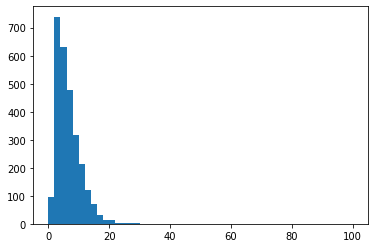

In [ ]:
lengths = []
sents = list(df['Sentence'])
for i in range(len(sents)):
  s = sents[i]
  lengths.append(len(s.split()))
lengths = np.array(lengths)
from matplotlib import pyplot as plt
plt.hist(lengths,range=(0,100), bins=50)

It looks like nearly all reviews are less than 20 words so let's cap our length at that

In [ ]:
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

ListOfList = []
for i in range(len(sents)):
  s = sents[i]
  ListOfList.append(s.split())

word2vecModel = gensim.models.Word2Vec(ListOfList,min_count=1,size=60, window=5)

# word embeddings of size 30, reviews being capped at length 20 so total size of review embedding => 60 x 20 => 1200
Allw2v = np.zeros((df.shape[0],1200))

for i in range(len(ListOfList)):
  s = ListOfList[i] #s = list of words in sentence
  if len(s) < 20:
    embdList = []
    for j in range(len(s)):
      word = s[j]
      try:
        embdList+=list(word2vecModel.wv[word].reshape(-1))
      except KeyError:
        print("ignoring word..")
    embdList = np.array(embdList).reshape(-1)
    Allw2v[i, 0:embdList.shape[0]] = embdList
  else:
    s = s[:20]
    embdList = []
    for j in range(len(s)):
      word = s[j]
      try:
        embdList+=list(word2vecModel.wv[word].reshape(-1))
      except KeyError:
        print("ignoring word..")
    embdList = np.array(embdList).reshape(-1)
    Allw2v[i, 0:embdList.shape[0]] = embdList

index = [num for num in range(Allw2v.shape[0])]
columns = [num for num in range(Allw2v.shape[1])]
Allw2vDF = pd.DataFrame(data=Allw2v,index = index, columns=columns)



Allw2vDF is now a dataframe of the overall review datasets where the first 20 words are converted into Word2Vec embeddings of size 30. Note, the rightmost column of the df are the labels

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

labels = df['Label']
w2vTrain, w2vTest, w2vTrainLabels, w2vTestLabels = train_test_split(Allw2vDF,labels)  #train-test split 

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(w2vTrain, w2vTrainLabels)
nbPreds =nb.predict(w2vTest)
nbAcc = np.mean(nbPreds==w2vTestLabels)

#Logistic Regression
lr = LogisticRegression().fit(w2vTrain, w2vTrainLabels)
lrPreds = lr.predict(w2vTest)
lrAcc = np.mean(lrPreds==w2vTestLabels)

#SVM
svm = SVC().fit(w2vTrain, w2vTrainLabels)
svmPreds = svm.predict(w2vTest)
svmAcc = np.mean(svmPreds==w2vTestLabels)

print("Word2Vec embedding results ..\n")
print("Naive Bayes Acc: " + str(nbAcc)+"\n")
print("LR Acc: " + str(lrAcc)+"\n")
print("SVM Acc: " + str(svmAcc))




Word2Vec embedding results ..

Naive Bayes Acc: 0.5240174672489083

LR Acc: 0.4847161572052402

SVM Acc: 0.5851528384279476


Note: Word2Vec above is trained with OUR corpus and not pre-trained which might be a cause of the poor performance. So, let's convert our sentences to numerical vectors using a pre-trained word2vec lib now.

In [ ]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[================================================--] 97.3% 1617.6/1662.8MB downloaded


Loaded in word2vec trained on Google News dataset. Word Embeddings live in R^300 space so if we only care about the first 20 words of a review then we have 300*20 = 6000 features 

In [ ]:
ListOfList = []
sents = list(df['Sentence'])
for i in range(len(sents)):
  s = sents[i]
  ListOfList.append(s.split())

Allw2v = np.zeros((df.shape[0],6000))

for i in range(len(ListOfList)):
  if (i%100==0):
    print(i)
  s = ListOfList[i] #s = list of words in sentence
  rem = []
  for l in range(len(s)):
    word = s[l]
    if word not in wv.index2word:
      rem.append(l)
  temp = s
  s = []
  for l in range(len(temp)):
    if l not in rem:
      s.append(temp[l])
  if len(s) < 20:
    embdList = []
    for j in range(len(s)):
      word = s[j]
      vec = wv[word]
      embdList+=list(vec)
    embdList = np.array(embdList).reshape(-1)
    Allw2v[i, 0:embdList.shape[0]] = embdList
  else:
    s = s[:20]
    embdList = []
    for j in range(len(s)):
      word = s[j]
      vec = wv[word]
      embdList+=list(vec)
    embdList = np.array(embdList).reshape(-1)
    Allw2v[i, 0:embdList.shape[0]] = embdList

index = [num for num in range(Allw2v.shape[0])]
columns = [num for num in range(Allw2v.shape[1])]
Allw2vDF = pd.DataFrame(data=Allw2v,index = index, columns=columns)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
labels = df['Label']
w2vTrain, w2vTest, w2vTrainLabels, w2vTestLabels = train_test_split(Allw2vDF,labels)  #train-test split 

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(w2vTrain, w2vTrainLabels)
nbPreds =nb.predict(w2vTest)
nbAcc = np.mean(nbPreds==w2vTestLabels)
print("NB done")
#Logistic Regression
lr = LogisticRegression().fit(w2vTrain, w2vTrainLabels)
lrPreds = lr.predict(w2vTest)
lrAcc = np.mean(lrPreds==w2vTestLabels)
print("LR done")
#SVM
svm = SVC().fit(w2vTrain, w2vTrainLabels)
svmPreds = svm.predict(w2vTest)
svmAcc = np.mean(svmPreds==w2vTestLabels)

print("Word2Vec embedding results ..\n")
print("Naive Bayes Acc: " + str(nbAcc)+"\n")
print("LR Acc: " + str(lrAcc)+"\n")
print("SVM Acc: " + str(svmAcc))


NB done
LR done
Word2Vec embedding results ..

Naive Bayes Acc: 0.5152838427947598

LR Acc: 0.7671033478893741

SVM Acc: 0.8034934497816594


Ad-hoc exploration of why pre-trained Word2Vec is doing poorly => print out the number of words we are throwing out on average in the first 20 words of a review

In [ ]:
ListOfList = []
sents = list(df['Sentence'])
for i in range(len(sents)):
  s = sents[i]
  ListOfList.append(s.split())


avgs = []
for i in range(len(ListOfList)):
  if (i%100==0):
    print(i)
  s = ListOfList[i] #s = list of words in sentence
  rem = []
  count = 0
  for l in range(len(s)):
    word = s[l]
    if word not in wv.index2word:
      count+=1
  avg = count/len(s)
  avgs.append(avg)
np.mean(avgs)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


0.03670074095199418

Roughly 3.5% of the words in a sentence are missing and so are excluded. That is, barely any words in the review are exclcuded when we convert the sentence to a vector. This indicates that even the pre-trained word2vecv isnt all that much better than n-gram techniques. If the words that are excluded aren’t really indicative of emotion or sentiment, then we can throw this method out. 

Ad-Hoc Exploration of the Type of Words that are missing

In [ ]:
excludedwords = []
for i in range(len(ListOfList)):
  if (i%100==0):
    print(i)
  s = ListOfList[i] #s = list of words in sentence
  for l in range(len(s)):
    word = s[l]
    if word not in wv.index2word:
      if word not in excludedwords:
        excludedwords.append(word)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700


In [ ]:
excludedwords

['factbased',
 'sexobsessed',
 'hollander',
 'didnt',
 'soundwise',
 'krussel',
 'wellwell',
 'humour',
 'doesnt',
 '15',
 'jabra',
 'eargels',
 '10',
 '2160',
 'tracfone',
 '90',
 '20',
 'mebunch',
 '785',
 'trond',
 'fausa',
 'aurvåg',
 '90s',
 'spinn',
 'greenstreet',
 'yardley',
 'vinegrette',
 '30',
 'gloveseverything',
 'nothingi',
 'v3i',
 'glassesthe',
 'overhip',
 'underservices',
 '810',
 'frequentyly',
 'phones2',
 'hitchcock',
 'mishima',
 'livingworking',
 'schrader',
 '80s',
 'woa',
 'themeat',
 'worldweariness',
 'cinematographyif',
 'thatsucked',
 'stateoftheart',
 'wasnt',
 'actingwise',
 'noircrimedrama',
 'belmondo',
 'melville',
 'crocdodile',
 'eccleston',
 'kieslowski',
 'favourite',
 'colours',
 'anythinga',
 'roths',
 'coppola',
 '25',
 'nicolas',
 'roeg',
 'postinos',
 '1998',
 'meeverything',
 '35',
 'foodand',
 '18th',
 'jutland',
 'longwearing',
 '350',
 'jabra350',
 'pg13',
 '5020',
 'comfortible',
 '24',
 'contstruct',
 '510',
 'comparablypriced',
 '70s',


Seems like pretrained word2vec isnt a good emebdding technique for our purposes 

Let's try Doc2Vec embeddings 

In [ ]:
import gensim, warnings
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
warnings.filterwarnings(action = 'ignore')

sentences = list(df['Sentence'])
ListOfList = []
for s in sentences:
  ListOfList.append(s.split()) #list of sentences but each sentence is itself a list of the words

TaggedDocs = [TaggedDocument(d, [i]) for i, d in enumerate(ListOfList)]

model = Doc2Vec(TaggedDocs, vector_size = 500, window = 4, min_count = 1, epochs = 100)  



model.docvecs[index] will return sentence embedding of the sentence tagged w/ index. model.wv[word] will return word embedding of the word: word 

In [ ]:
doc2vecAr = np.zeros((df.shape[0], 500)) #500 since thats the vector_size param in doc2vec function call

for i in range(doc2vecAr.shape[0]):
  doc2vecAr[i,:] = model.docvecs[i]

index = [num for num in range(doc2vecAr.shape[0])]
columns = [num for num in range(500)]
d2vDF = pd.DataFrame(data=doc2vecAr,index = index, columns=columns)

d2vTrain, d2vTest, d2vTrainLabels, d2vTestLabels = train_test_split(d2vDF, df['Label'])

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(d2vTrain, d2vTrainLabels)
nbPreds =nb.predict(d2vTest)
nbAcc = np.mean(nbPreds==d2vTestLabels)
print("NB done")
#Logistic Regression
lr = LogisticRegression().fit(d2vTrain, d2vTrainLabels)
lrPreds = lr.predict(d2vTest)
lrAcc = np.mean(lrPreds==d2vTestLabels)
print("LR done")
#SVM
svm = SVC().fit(d2vTrain, d2vTrainLabels)
svmPreds = svm.predict(d2vTest)
svmAcc = np.mean(svmPreds==d2vTestLabels)

print("Doc2Vec embedding results ..\n")
print("Naive Bayes Acc: " + str(nbAcc)+"\n")
print("LR Acc: " + str(lrAcc)+"\n")
print("SVM Acc: " + str(svmAcc))

NB done
LR done
Doc2Vec embedding results ..

Naive Bayes Acc: 0.5720524017467249

LR Acc: 0.7161572052401747

SVM Acc: 0.7001455604075691


Poor performance when compared to n-gram type embeddings techniques

Let's combine word2vec and doc2vec. The d2v model stores representations for not only the sentence but also for each word. So, if we consider a fixed length of words for all sentences (let's say 15 this time). We can get, for EACH sentence, an embedding that has the following number of features: vector size + 15*vector size. If the sentence is less than 15 words, we pad the end with zeros. So, if we set vector_size to be 30, than we have 30 + 15*30 = 480 features. If we set it to 50, we get 50 + 15*50 = 800 features

In [ ]:
import builtins
model = Doc2Vec(TaggedDocs, vector_size = 50, window = 4, min_count = 1, epochs = 100)  
doc2vecAr = np.zeros((df.shape[0], 800))
for i in range(df.shape[0]):
  s = ListOfList[i] #s = sentence i has a list
  docEmbd = list(model.docvecs[i]) #list of the sentence embed vector
  wordEmbds = []
  if (builtins.len(s) > 15):
    s = s[:15]
  for w in s:
    wordEmbds+=list(model.wv[w])
  length = builtins.len(s)
  finalEmbd = np.array(docEmbd+wordEmbds)
  doc2vecAr[i,0:(length*50+50)] = finalEmbd

index = [num for num in range(doc2vecAr.shape[0])]
columns = [num for num in range(doc2vecAr.shape[1])]
d2vDF = pd.DataFrame(data=doc2vecAr,index = index, columns=columns)

d2vTrain, d2vTest, d2vTrainLabels, d2vTestLabels = train_test_split(d2vDF, df['Label'])

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(d2vTrain, d2vTrainLabels)
nbPreds =nb.predict(d2vTest)
nbAcc = np.mean(nbPreds==d2vTestLabels)
print("NB done")
#Logistic Regression
lr = LogisticRegression().fit(d2vTrain, d2vTrainLabels)
lrPreds = lr.predict(d2vTest)
lrAcc = np.mean(lrPreds==d2vTestLabels)
print("LR done")
#SVM
svm = SVC().fit(d2vTrain, d2vTrainLabels)
svmPreds = svm.predict(d2vTest)
svmAcc = np.mean(svmPreds==d2vTestLabels)

print("Doc2Vec embedding results ..\n")
print("Naive Bayes Acc: " + str(nbAcc)+"\n")
print("LR Acc: " + str(lrAcc)+"\n")
print("SVM Acc: " + str(svmAcc))



NB done
LR done
Doc2Vec embedding results ..

Naive Bayes Acc: 0.6346433770014556

LR Acc: 0.6812227074235808

SVM Acc: 0.7030567685589519


Safe to conlcude that no "flavor" of doc2vec has been shown to be all that effective. 

LSTM RNN (Logic and code based on https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948 

COULD NOT IMPLEMENT BY DEADLINE

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")

In [ ]:
from collections import Counter
sents = list(df['Sentence'])
ListOfList = []
for s in sents:
  sentList = s.split()
  ListOfList.append(sentList)
#ListOfList is a list of each sentence where each sentence is itself a list of the words in the sentence 
allwords = (' '.join(sents)).split() #vocabulary of the corpus 
counter = Counter(allwords)
wordsCount = counter.most_common(len(allwords)) #most common words have lowest indices


# creating a dict
word_dict = {w:i+1 for i,(w,c) in enumerate(wordsCount)}

#convert sentences to list of integers 
listOfIntList = []
for s in ListOfList:
  s2int = []
  for w in s:
    s2int.append(word_dict[w])
  listOfIntList.append(s2int)
labels = df['Label']



(array([ 97., 345., 718., 307., 479., 183., 255.,  93., 120.,  50.,  38.,
         13.,  14.,   6.,  10.,   2.,   4.,   1.,   2.,   2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 <a list of 20 Patch objects>)

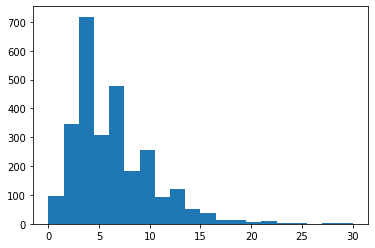

In [ ]:
from matplotlib import pyplot as plt
reviewLens = []
for l in listOfIntList:
  reviewLens.append(len(l))
plt.hist(np.array(reviewLens), bins=20,range=(0,30)) 

Let the max length of our reviews be 7

In [ ]:
vecAr = np.zeros((len(listOfIntList), 7), dtype = int)
for i, review in enumerate(listOfIntList):
  review_len = len(review)  
  if review_len <= 7:
    zeros = list(np.zeros(7-review_len))
    new = review+zeros
  elif review_len > 7:
    new = review[0:7]
  vecAr[i,:] = np.array(new)
vecAr[:10,:]

array([[1338,  746,   78,    0,    0,    0,    0],
       [2094,    9,   72, 1339,   65,  407,  221],
       [2095,  951,  465,   91,    0,    0,    0],
       [   4,   51,  623,   27,   38,  533,  200],
       [ 270,  952,    0,    0,    0,    0,    0],
       [ 953,  408,   92,    0,    0,    0,    0],
       [ 251,  747,   93,  176,   53,  100,  466],
       [  72,   94,  954,    0,    0,    0,    0],
       [   1, 1340,    0,    0,    0,    0,    0],
       [ 201,  748, 1341,  749,  109,    1, 1342]])

vecAr is a numpy array of shape(num reviews x 7)

In [ ]:
from sklearn.model_selection import train_test_split
labels = np.array(labels)
trainX, testX, trainY, testY = train_test_split(vecAr,labels)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
train_data = TensorDataset(torch.from_numpy(trainX), torch.from_numpy(trainY))
test_data = TensorDataset(torch.from_numpy(testX), torch.from_numpy(testY))

# dataloaders
batch_size = 30

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim) #first param is dictionary size, second param is size of embedding 
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, 1, batch_first=True)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, 1) #input is hidden_dim and output is of dim 1 
        self.sig = nn.Sigmoid()
        

    def forward(self, x):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        # Note x is of shape (batch size, sentence length)
        batch_size = x.size(0) 

        # embeddings and lstm_out
        embeds = self.embedding(x)
        embeds = torch.reshape(embeds, (7, batch_size, embedding_dim))
        lstm_out, hidden = self.lstm(embeds) #input param hidden: 1 x batch_size x hidden_dim

        #lstm shape => (7, batch_size, hidden_dim)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 

        #fully conn layer
        out = self.fc(lstm_out) #out = 7 * batch_size x 1 

        # sigmoid function
        sig_out = self.sig(out) # sig_out = 7 * batch_sze x 1
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        #sig_out is of shape (batch_size x 1) 
        #hidden is of shape (1 x batch_size x hidden_dim)

        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (is_cuda):
            hidden = (weight.new(1, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(1, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(1, batch_size, self.hidden_dim).zero_(),
                      weight.new(1, batch_size, self.hidden_dim).zero_())
        
        return hidden

vocab_size = len(word_dict) + 1 #extra 1 for padding
embedding_dim = 50
hidden_dim = 256


model = SentimentLSTM(vocab_size,embedding_dim, hidden_dim)

#moving to gpu
model.to(device)

# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred,label):
    pred = torch.round(pred.squeeze())
    return torch.sum(pred == label.squeeze()).item()



In [ ]:
clip = 5
epochs = 10 
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])
        model.zero_grad()
        output, h = model(inputs)
        
        # calculate the loss and perform backprop

        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy/batch_size
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        print(train_acc)
    
    """    
    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, h = model(inputs)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), '../working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')"""
    

tensor(26, device='cuda:0')
0.8666666666666667
tensor(29, device='cuda:0')
1.8333333333333335
tensor(29, device='cuda:0')
2.8000000000000003
tensor(28, device='cuda:0')
3.7333333333333334
tensor(29, device='cuda:0')
4.7
tensor(29, device='cuda:0')
5.666666666666667
tensor(29, device='cuda:0')
6.633333333333334
tensor(29, device='cuda:0')
7.6000000000000005
tensor(26, device='cuda:0')
8.466666666666667
tensor(27, device='cuda:0')
9.366666666666667
tensor(28, device='cuda:0')
10.3
tensor(26, device='cuda:0')
11.166666666666668
tensor(28, device='cuda:0')
12.100000000000001
tensor(26, device='cuda:0')
12.966666666666669
tensor(27, device='cuda:0')
13.866666666666669
tensor(26, device='cuda:0')
14.733333333333336
tensor(28, device='cuda:0')
15.66666666666667
tensor(27, device='cuda:0')
16.56666666666667
tensor(27, device='cuda:0')
17.46666666666667
tensor(28, device='cuda:0')
18.400000000000002
tensor(28, device='cuda:0')
19.333333333333336
tensor(28, device='cuda:0')
20.26666666666667
ten